Introduction to machine learning

Mean, median, mode, standard deviation

In [7]:
import numpy
from scipy import stats
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
mean = numpy.mean(speed)
median = numpy.median(speed)
mode = stats.mode(speed)
std = numpy.std(speed)
variance = numpy.var(speed)
percentile70 = numpy.percentile(speed, 70)
print ('Mean: ',mean)
print ('Median: ',median)
print ('Mode: ',mode)
print ('Standard deviation: ',std)
print ('Variance: ',variance)
print ('70. Percentile: ',percentile70)

Mean:  89.76923076923077
Median:  87.0
Mode:  ModeResult(mode=array([86]), count=array([3]))
Standard deviation:  9.258292301032677
Variance:  85.71597633136093
70. Percentile:  90.39999999999999


Histogram

In [ ]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.uniform(0.0, 5.0, 250)

plt.hist(x, 5)
plt.show()

Normal Distribution

In [ ]:
import numpy
import matplotlib.pyplot as plt
x = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

Scatter Plot

In [ ]:
import numpy
import matplotlib.pyplot as plt
x = numpy.random.normal(5.0, 1.0, 1000)
y = numpy.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

Linear Regression

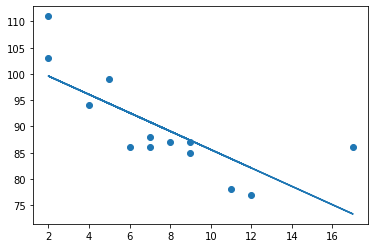

The coefficient of correlation (r):  -0.758591524376155
The speed of 10 years old car:  85.59308314937454


In [12]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)

#draw the line of Linear Regression
plt.plot(x, mymodel)
plt.show()

#check how data fit a linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
print ('The coefficient of correlation (r): ', r)

#use the function to predict the speed of 10 years old car
speed = myfunc(10)
print ('The speed of 10 years old car: ', speed)

Polynomial Regression

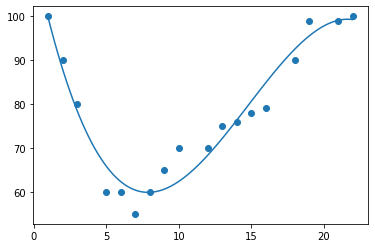

r-squared value : 0.9432150416451025
The speed of a car passing at 17 P.M:  88.87331269697991


In [15]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

#check how data fit the polynomial regression
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
print('r-squared value :', r2_score(y, mymodel(x)))

#use the function to predict the speed of a car passing at 17 P.M
speed = mymodel(17)
print ('The speed of a car passing at 17 P.M: ', speed)

Multiple regression

In [21]:
import pandas
from sklearn import linear_model

print ("A regression object to predict CO2 values based on a car's weight and volume")
df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
# fit = fills the regression object with data that describes the relationship
regr.fit(X.values, y.values)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print('CO2 emission when weight=2300kg and volume=1300cm3: ',predictedCO2)

#coefficient = factor that describes the relationship with an unknown variable
print('coefficient value of weight and volume: ', regr.coef_)
print ('If weight increase by 1kg, CO2 emission increased by ',regr.coef_[0], 'g')
print ('If volume increase by 1cm3, CO2 emission increased by ',regr.coef_[1], 'g')

## use this to scale them so that both have comparable values / can be compared easier
## from sklearn.preprocessing import StandardScaler
## scale = StandardScaler()
## scaledX = scale.fit_transform(X)
## regr.fit(scaledX, y)
## scaled = scale.transform([[2300, 1.3]])

## predictedCO2 = regr.predict([scaled[0]])
## print(predictedCO2)

A regression object to predict CO2 values based on a car's weight and volume
CO2 emission when weight=2300kg and volume=1300cm3:  [107.2087328]
coefficient value of weight and volume:  [0.00755095 0.00780526]
If weight increase by 1kg, CO2 emission increased by  0.00755094727030069 g
If volume increase by 1cm3, CO2 emission increased by  0.007805257527747127 g


What is Train/Test
Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the the data set into two sets: a training set and a testing set.

80% for training, and 20% for testing.

You train the model using the training set.

You test the model using the testing set.

Train the model means create the model.

Test the model means test the accuracy of the model.

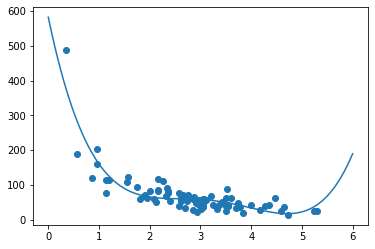

r-squared value (train data):  0.79886455446298
r-squared value (test data):  0.8086921460343566
how much a person spend for staying for 5 minutes (dollars):  22.8796259181172


In [26]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

#check how data fit the polynomial regression (train data)
r2 = r2_score(train_y, mymodel(train_x))
print('r-squared value (train data): ',r2)

#check how data fit the polynomial regression (test data)
r2 = r2_score(test_y, mymodel(test_x))
print('r-squared value (test data): ',r2)

#predict values (how much a person spend for staying for 5 minutes)
print('how much a person spend for staying for 5 minutes (dollars): ', mymodel(5))

Decision Tree (data has to be numerical)

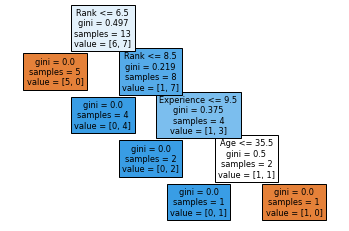

In [35]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Age = [36,42,23,52,43,44,66,35,52,35,24,18,45]
Experience = [10,12,4,4,21,14,3,14,13,5,3,3,9]
Rank = [9,4,6,4,8,5,7,9,7,9,5,7,9]
Nationality = ['UK','USA','N','USA','USA','UK','N','UK','N','N','USA','UK','UK']
Go = ['NO','NO','NO','NO','YES','NO','YES','YES','YES','YES','NO','YES','YES']
df = pandas.DataFrame(list(zip(Age, Experience, Rank,Nationality, Go)),columns=['Age', 'Experience', 'Rank', 'Nationality','Go'])

# change string values to numerical values
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

# set feature (X) and target (y) columns
features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

#create decision tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
#tree.plot_tree(dtree, feature_names=features, filled=True)
#plt.show()

Confusion Matrix

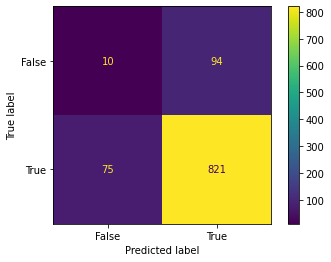

{'Accuracy': 0.831, 'Precision': 0.8972677595628415, 'Sensitivity_recall': 0.9162946428571429, 'Specificity': 0.09615384615384616, 'F1_score': 0.9066813914964108}


In [38]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


Hierarchical Clustering (dendogram)

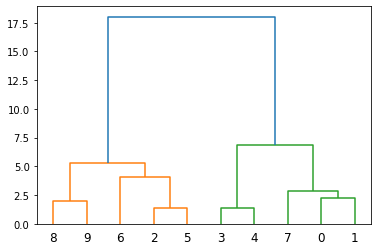

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

Hierarchical Clustering (2D Dot)

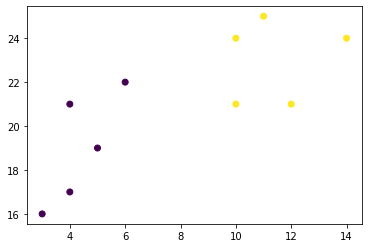

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

Logistic Regression

In [43]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print('predict if the tumor cancerous when the size is 3.46mm: ', predicted)

predict if the tumor cancerous when the size is 3.46mm:  [0]
